2
[[1. 0. 1. 1.]
 [1. 1. 0. 1.]]


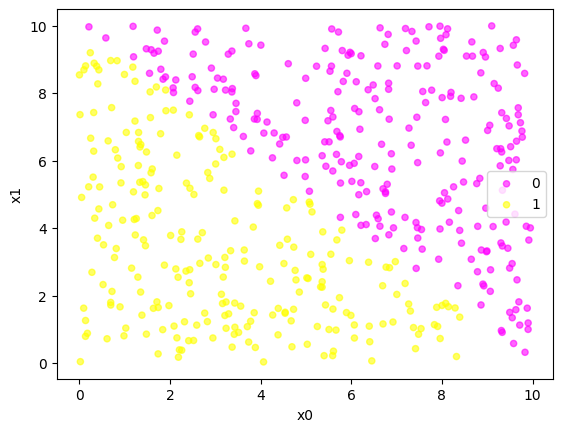

In [18]:
from matplotlib.cm import get_cmap
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
dataset = pd.read_csv("2d-synthetic.csv")
classes = dataset["label"].unique()
cmap = get_cmap('spring')
fig, ax = plt.subplots()
colors = cmap(np.linspace(0,1,classes.size))
for i, c in enumerate(classes):
    df = dataset[dataset['label']==c]
    co = [colors[i]] * df.shape[0]
    df.plot.scatter(x='x0', y='x1', ax=ax, c=co, alpha=.6, label=c)
    ax.legend()
plt.show()

/var/folders/2w/v0dl0shj2b72lj3tg_gtq3cr0000gn/T/ipykernel_90241/2657539631.py:3: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(data=dataset, x='x0', y='x1',hue='label', palette=sns.color_palette("dark"))


<AxesSubplot: xlabel='x0', ylabel='x1'>

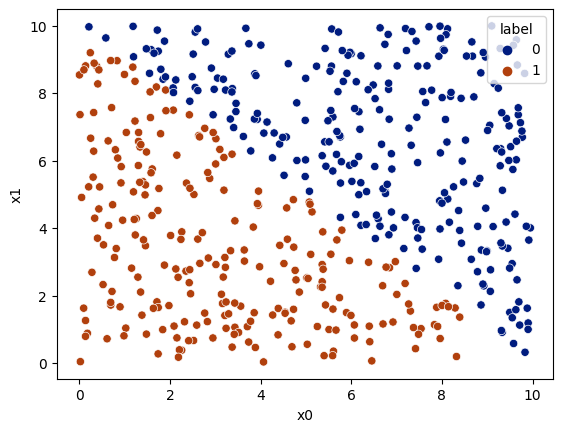

In [33]:
# METODO INTELLIGENTE
import seaborn as sns
sns.scatterplot(data=dataset, x='x0', y='x1',hue='label', palette=sns.color_palette("dark"))


0.95


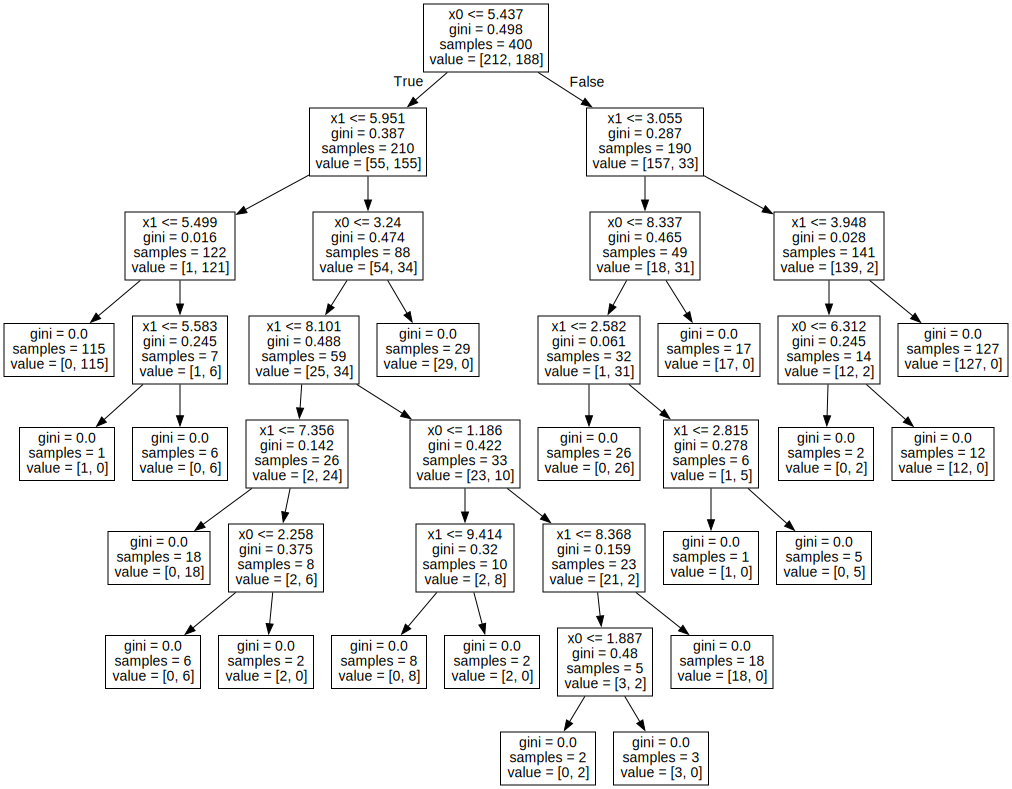

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from graphviz import Source

X=dataset[["x0","x1"]]
Y=dataset["label"]
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
Source(export_graphviz(clf, out_file=None, feature_names=["x0","x1"]))


/var/folders/2w/v0dl0shj2b72lj3tg_gtq3cr0000gn/T/ipykernel_90241/238473691.py:1: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax=sns.scatterplot(data=dataset, x='x0', y='x1',hue='label', palette=sns.color_palette("dark"))


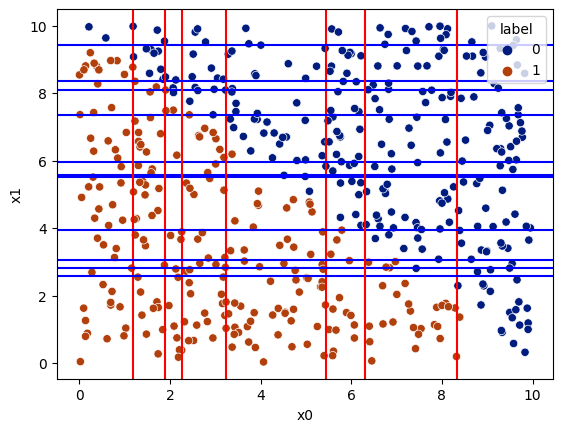

In [67]:
ax=sns.scatterplot(data=dataset, x='x0', y='x1',hue='label', palette=sns.color_palette("dark"))

for x,y in zip(clf.tree_.feature, clf.tree_.threshold):
    if x==0:
        ax.axvline(y, color='r')
    elif x==1:
        ax.axhline(y, color='b')
    else:
        continue
